<a href="https://colab.research.google.com/github/Kousikdutta1/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Kousik_Dutta_Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

###**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##**Introduction**

Bike rentals have become very popular in recent years, and it seems people are using it more often. With relatively cheaper rates and ease of pickup and drop at own convenience is what making this business boom.

Here I will try to implement various machine learning algorithm to predict this regression problem. The content of the notebook includes - 

  * **Exploratory data analysis**: In this section I will work on various features of the dataset and by using different visualization technique I will establish relationships among them.

  * **Data Wrangling**: In this section I will try to modify our dataset, handle missing values, outliers, form new columns, convert data types etc.

  * **Splitting the dataset and Standardization**: Here I will split the dataset into train and test sets and apply standardization method.  

  * **Comparison between different models**: Here I will use some Machine Learning algorithms such as Linear regression, Decision tree, Random forest, XGBoost, Gradient Boosting Technique and also check the performance using different evaluation metrics.

  * **Model Explainability**: In this section we will see what goes on inside the model we built.
  * **Conclusion**: Finally, I will land on some insights from our experiment and frame all the observations made during the analysis.



##**Data Preparation**

**Let's Start Our Journey by Importing and Inspecting the Dataset**

In [135]:
# Importing Required Libraries for our analysis 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')


In [136]:
# Let's mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Seoul Bike Sharing Demand Prediction - Kousik Dutta/SeoulBikeData.csv'

# Now let's import dataset 

bike_df = pd.read_csv(path, encoding = 'unicode_escape')

In [138]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :',bike_df.shape)

Shape of the dataset is : (8760, 14)


* **In our dataset we have 8760 rows and 14 columns.**

In [139]:
# Checking all the columns present in our dataset

bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [140]:
# Checking top 5 records in DataFrame

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [141]:
# Checking bottom 5 records in DataFrame

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [142]:
# Let's check the datatypes and null values of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [143]:
# Let's check the statistical description of the dataset

bike_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [144]:
#  Let's check the total missing data 

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **It can be seen that there is no missing data in our dataset.**

##**Exploratory Data Analysis**

###**Let's do univariate analysis on different columns :**

**1. ' Rented Bike Count ' - Dependent Variable**

In [145]:
# let's see descriptive statistics of Rented Bike Count

print("Descriptive statisticks of 'Rented Bike Count' :")
print("_ _"*20)

bike_df['Rented Bike Count'].describe()

Descriptive statisticks of 'Rented Bike Count' :
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _


count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

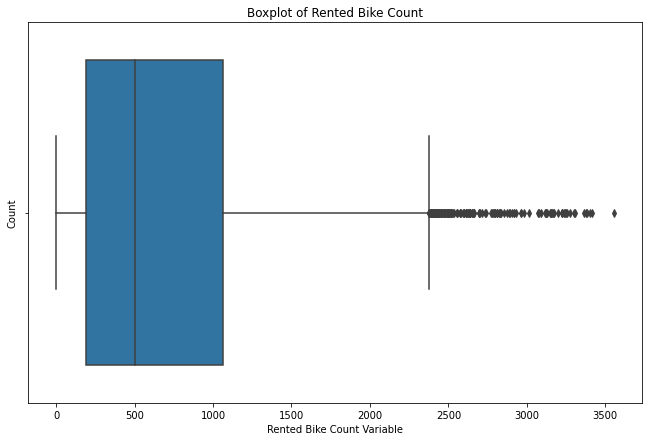

In [146]:
# Let's check outliers by using a boxplot

plt.figure(figsize = (11,7))
sns.boxplot(bike_df['Rented Bike Count'])
plt.xlabel('Rented Bike Count Variable')
plt.ylabel('Count')
plt.title('Boxplot of Rented Bike Count')
plt.show();

* **From above it can be seen that we do have outliers present in our dependent variable (after ~2500), we will deal with them in later part of the analysis.**

Skewness of the dv : 1.1534281773679014
Kurtosis of the dv : 0.8533869902003848




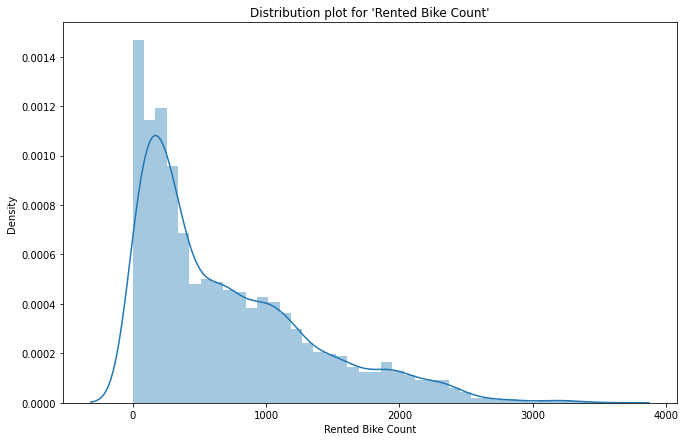

In [147]:
# Checking the skewness and kurtosis of dependent variable before transformation

print(f"Skewness of the dv : {bike_df['Rented Bike Count'].skew()}")
print(f"Kurtosis of the dv : {bike_df['Rented Bike Count'].kurt()}")
print('='*39)
print('\n')

# Let's visualize the distribution of dependent variable before transformation
plt.figure(figsize=(11,7))
sns.distplot(bike_df['Rented Bike Count'])
plt.title("Distribution plot for 'Rented Bike Count'")
plt.show();


* **It can be understood from above that Dependent Variable is positively skewed having value 1.153, and has kurtosis of 0.8533.**
 **Now let's do square root transformation of our dependent variable as it is moderately skewed, it will give us more clarification about data and we can visualize in a better way.**  

Skewness of the dv after transformation : 0.237362090985412
Kurtosis of the dv after transformation : -0.6572011997861553




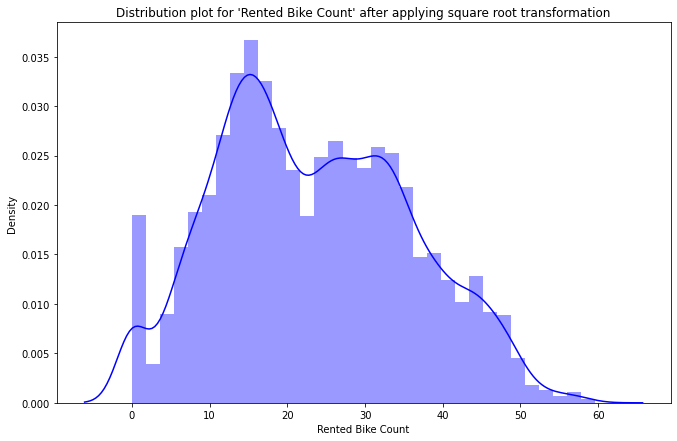

In [148]:
# Checking the skewness and kurtosis of dependent variable after transformation

print(f"Skewness of the dv after transformation : {np.sqrt(bike_df['Rented Bike Count']).skew()}")
print(f"Kurtosis of the dv after transformation : {np.sqrt(bike_df['Rented Bike Count']).kurt()}")
print('='*62)
print('\n')


# Let's visualize the distribution of dependent variable before transformation
plt.figure(figsize=(11,7))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color='b')
plt.title("Distribution plot for 'Rented Bike Count' after applying square root transformation")
plt.show();



* **Great! as we can see our dependent variable is almost looking like normal distribution after applying square root transformation , now there is no need to remove outliers.**

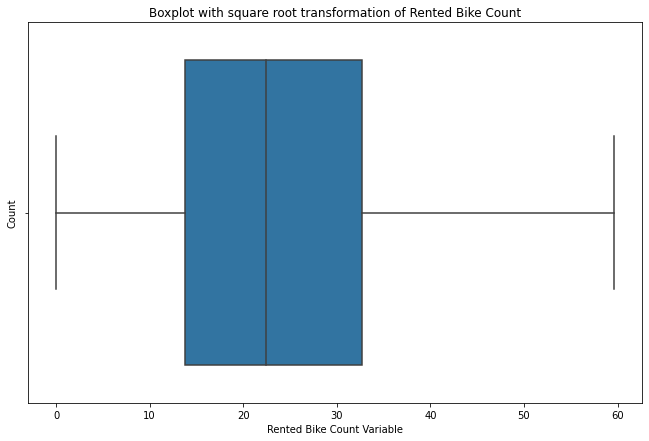

In [149]:
# We can visualize the box plot (with Square root transformation) 

plt.figure(figsize = (11,7))
sns.boxplot(np.sqrt(bike_df['Rented Bike Count']))
plt.xlabel('Rented Bike Count Variable')
plt.ylabel('Count')
plt.title('Boxplot with square root transformation of Rented Bike Count')
plt.show();

**2. Functioning Day**

In [150]:
# Lets check unique values of column 'Functioning Day'

print(f" Unique values for the column Functioning Day : {bike_df['Functioning Day'].unique()}")

 Unique values for the column Functioning Day : ['Yes' 'No']


**'Functioning Day' is a categorical variable with two values 'Yes' and 'No' , It tells us whether the day is a normal business day or not.**

In [151]:
# Let's find the count of yes ad no

print(bike_df['Functioning Day'].value_counts())

Yes    8465
No      295
Name: Functioning Day, dtype: int64


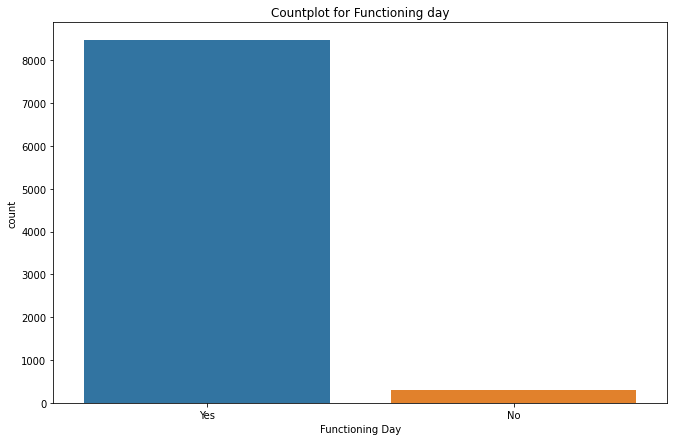

In [152]:
# Let's visualize the counts of 'Functioning Day'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Functioning Day'])
plt.title('Countplot for Functioning day')
plt.show();

* **As it can be seen from above that majority of the day are functioning day.**

**3. Holiday**

In [153]:
# Lets check unique values of column 'Holiday'

print(f" Unique values for the column Holiday : {bike_df['Holiday'].unique()}")

 Unique values for the column Holiday : ['No Holiday' 'Holiday']


**'Holiday' is a categorical variable with two values 'No Holiday' and 'Holiday'.**

In [154]:
# Let's find the count of 'No Holiday' and 'Holiday'

print(bike_df['Holiday'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


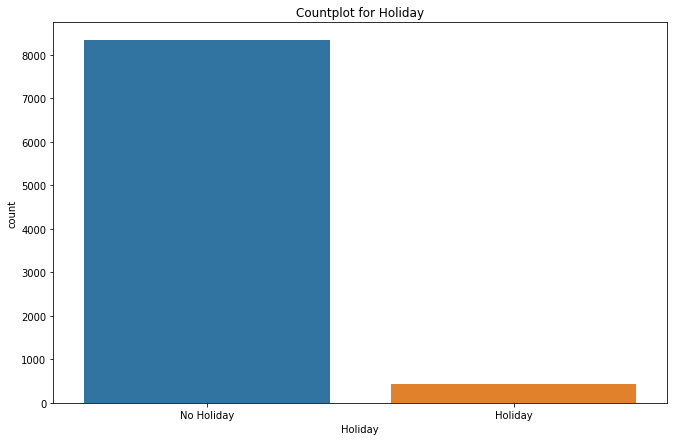

In [155]:
# Let's visualize the counts of 'Holiday'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Holiday'])
plt.title('Countplot for Holiday')
plt.show();

* **Now looks like we have a majority class here also , number of 'No holiday' is very high compare to 'holiday'.**

**4. Seasons**

In [156]:
# Lets check unique values of column 'Seasons'

print(f" Unique values for the column 'Seasons' : {bike_df['Seasons'].unique()}")

 Unique values for the column 'Seasons' : ['Winter' 'Spring' 'Summer' 'Autumn']


**'Seasons' is a categorical variable with four values 'Winter', 'Spring', 'Summer', 'Autumn'.**

In [157]:
# Let's find the count of each class in 'Seasons' column

print(bike_df['Seasons'].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


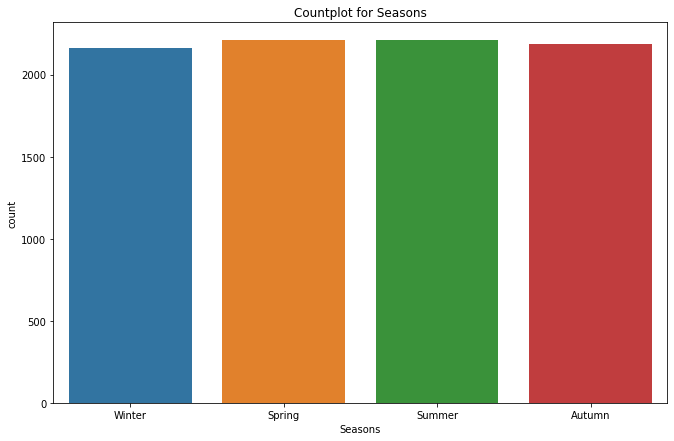

In [158]:
# Let's visualize the counts of 'Seasons'

plt.figure(figsize = (11,7))
sns.countplot( bike_df['Seasons'])
plt.title('Countplot for Seasons')
plt.show();

* **As it can be seen from above that every class has almost equal proportions.**

**5. Date**

**So now, we will exlore date column. This variable will tell us about date of bookings across year.**

In [159]:
# Let's analyse dates, months and years

# Separating Year

def date_year (date_column):
  return date_column[6:]

In [160]:

# Separating Month

def date_month (date_column):
  return date_column[3:5]

In [161]:
# Separating Day

def date_day (date_column):
  return date_column[:2]

In [162]:
#  we will be creating a copy of the original dataset so that we can operate on that dataset

bike_df_copy = bike_df.copy()

In [163]:
# Let's make 3 new columns, so that we can analyse on different date, month, years

bike_df_copy['Year'] = bike_df_copy['Date'].apply(date_year)
bike_df_copy['Month'] = bike_df_copy['Date'].apply(date_month)
bike_df_copy['Day'] = bike_df_copy['Date'].apply(date_day)


In [164]:
# Now, let's check the dataset after appending new columns

bike_df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,01
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,01
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,01
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,01
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,01


**Yes! we have created 3 new columns , now we can analyse on year, month and day.**

In [165]:
# Let's first check unique values of 'Year'

print(f" Unique values for the column 'Year' : {bike_df_copy['Year'].unique()}")

 Unique values for the column 'Year' : ['2017' '2018']


In [166]:
# Let's check value counts of 'Year'

print(bike_df_copy['Year'].value_counts())


2018    8016
2017     744
Name: Year, dtype: int64


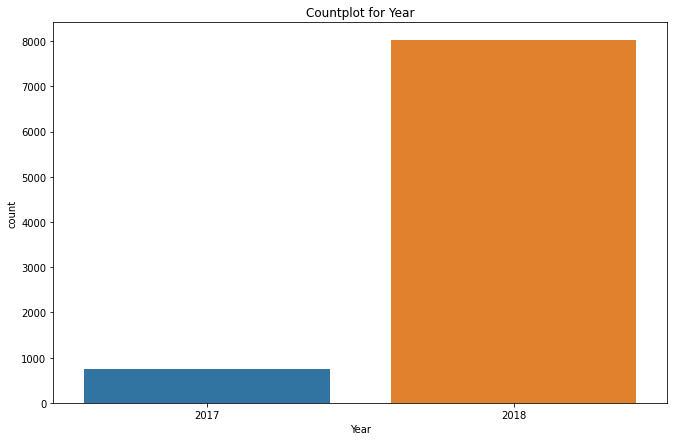

In [167]:
# Let's visualize the counts of 'Year'

plt.figure(figsize = (11,7))
sns.countplot( bike_df_copy['Year'])
plt.title('Countplot for Year')
plt.show();

* **We can see that we have most of the data from 2018, from 2017 we have very less amount of data present.**

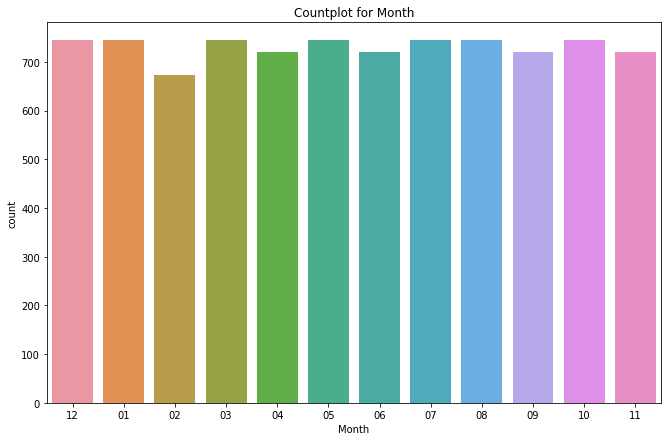

In [168]:

# Let's visualize the counts of 'Month'

plt.figure(figsize = (11,7))
sns.countplot( bike_df_copy['Month'])
plt.title('Countplot for Month')
plt.show();

* **We can see that we have almost equal number of observtion in every month.**

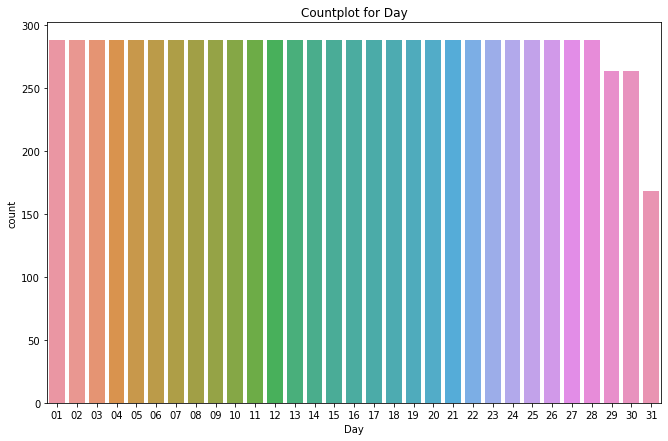

In [169]:

# Let's visualize the counts of 'Day'

plt.figure(figsize = (11,7))
sns.countplot( bike_df_copy['Day'])
plt.title('Countplot for Day')
plt.show();

* **We can see that we have almost equal number of observation in almost every day, except end days of months.**

##**Now, Let's analyse numerical variables.**

In [170]:
# Extracting all the numerical variables from dataset.

bike_df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [171]:
# Let's first define numerical variables. 

numerical_variables = ['Rented Bike Count',	'Hour',	'Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']

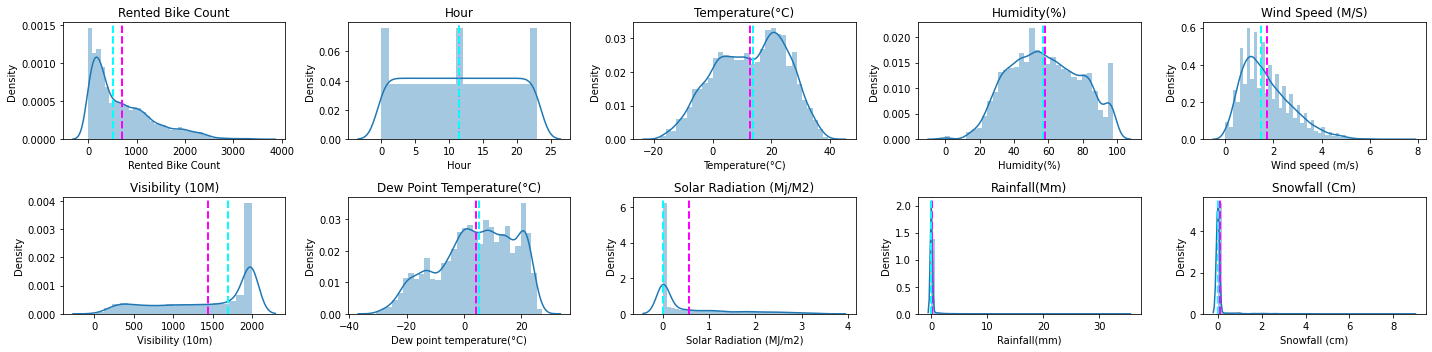

In [172]:
# Let's visualize the distribution plot for numerical variables.

fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_variables) :
  plt.subplot(2,5,index+1)
  sns.distplot(bike_df[column])
  feature = bike_df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}')
  plt.tight_layout()

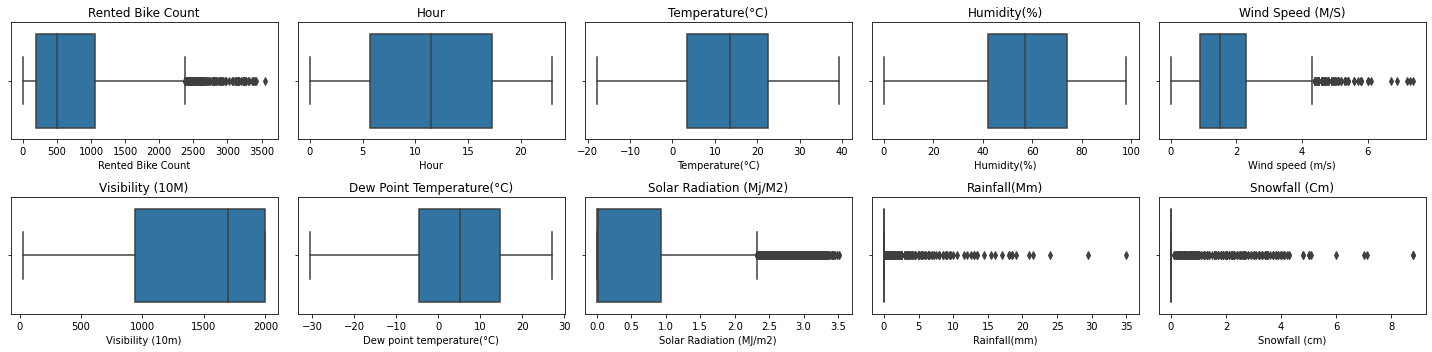

In [173]:
# Let's visualize the Boxplot for numerical variables to check outliers.

plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_variables) :
  plt.subplot(2,5,index+1)
  sns.boxplot(bike_df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

* **It can be seen from above distribution plots and boxplots that variable such as ' Rainfall ' and ' Snowfall ' have almost all zeros, and 'solar radiation' and 'visibility' column has skewed data.**

###**Cleaning and Manipulating the Dataset :**

In [174]:
# changing the data types of Date, day and month column.

bike_df_copy['Date'] = pd.to_datetime(bike_df_copy['Date'])
bike_df_copy['Day'] = bike_df_copy['Day'].astype('int64')
bike_df_copy['Month'] = bike_df_copy['Month'].astype('int64')


In [175]:
# Let's get new features from 'Date' and 'hour' variable

bike_df_copy['weekend'] = bike_df_copy['Date'].apply(lambda x : 1 if (x.day_name() == 'Saturday' or x.day_name() == 'Sunday') else 0)
bike_df_copy['shift'] = bike_df_copy['Hour'].apply(lambda x : 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else'evening'))

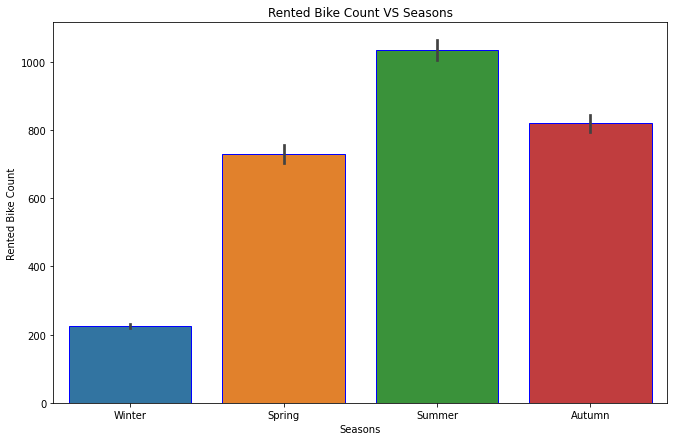

In [176]:
# Checking the Rented Bike Count in each seasons

plt.figure(figsize = (11,7))
sns.barplot( bike_df_copy['Seasons'], bike_df_copy['Rented Bike Count'], edgecolor = 'blue')
plt.title('Rented Bike Count VS Seasons')
plt.show();

* **It looks like in summer bike demands are very high and in winter bike demands are very less.**

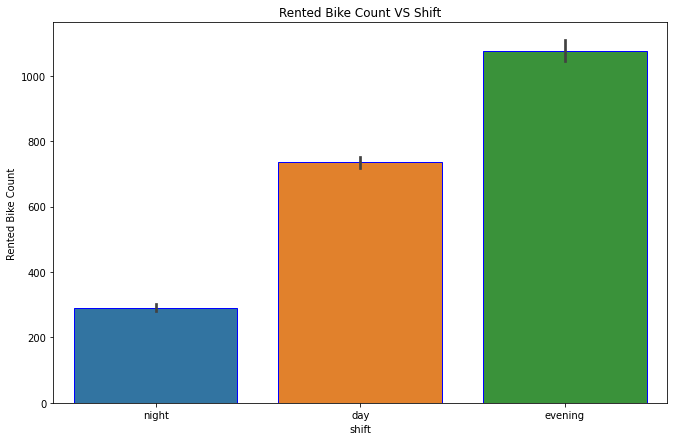

In [177]:
# Checking the Rented Bike Count in each shift

plt.figure(figsize = (11,7))
sns.barplot( bike_df_copy['shift'], bike_df_copy['Rented Bike Count'], edgecolor = 'blue')
plt.title('Rented Bike Count VS Shift')
plt.show();

* **From above it can be seen that in Day and evening time bike demands are very high.**

**Let's print categorical and numerical features present in our dataset.**

In [178]:
categorical_features = [i for i in bike_df_copy.columns if i not in bike_df_copy.describe().columns]
print(f"Categegorical features present in our dataset : {categorical_features}")

print("\n")

numerical_features = [i for i in bike_df_copy.columns if i in bike_df_copy.describe().columns]
print(f"Numerical features present in our dataset : {numerical_features}")

Categegorical features present in our dataset : ['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'shift']


Numerical features present in our dataset : ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'weekend']


In [179]:
# Let's drop 'Date' and 'Year' column from Categorical features

bike_df_copy.drop(columns = ['Date'], inplace = True)

bike_df_copy.drop(columns = ['Year'], inplace = True)


* **As we have extracted whatever was needed from 'Date' column, It was not needed anymore, so we have removed it. Also in Year column almost 97 % of observations are of 2018 , we have dropped this column from our analysis.**

**Let's convert categorical variables to numerical varibales - 'One Hot Encoding' and 'Label Encoding'**

In [180]:
# Let's convert categorical variables to numerical varibales

# Defining Label encoder based on above categorical column 'Holiday', 'Functioning Day' and 'shift'


label_encoding = {'Holiday' : {'Holiday': 1, 'No Holiday': 0}, 'Functioning Day' : {'Yes' : 1, 'No' : 0}, 'shift' : {'night' : 0 , 'day' : 1, 'evening' : 2}}

bike_df_copy = bike_df_copy.replace(label_encoding)

# Defining One Hot Encoding on 'Seasons' column

bike_df_copy = pd.get_dummies (bike_df_copy, columns = ['Seasons'], drop_first = True)



In [181]:
# Let's check the dataset after adding different columns

bike_df_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Day,weekend,shift,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,1,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,12,1,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,12,1,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,12,1,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,12,1,0,0,0,0,1


* **Yes! We have successfully converted all the categorical columns to numerical varibales.**

**Let's check linearity between our dependent and independent variable.**

In [182]:
# Defining Independent Variables

independent_variable = [i for i in bike_df_copy.columns if i not in ['Rented Bike Count']]

print(f"Independent Variables present in our dataset : {independent_variable}")

Independent Variables present in our dataset : ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Month', 'Day', 'weekend', 'shift', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']


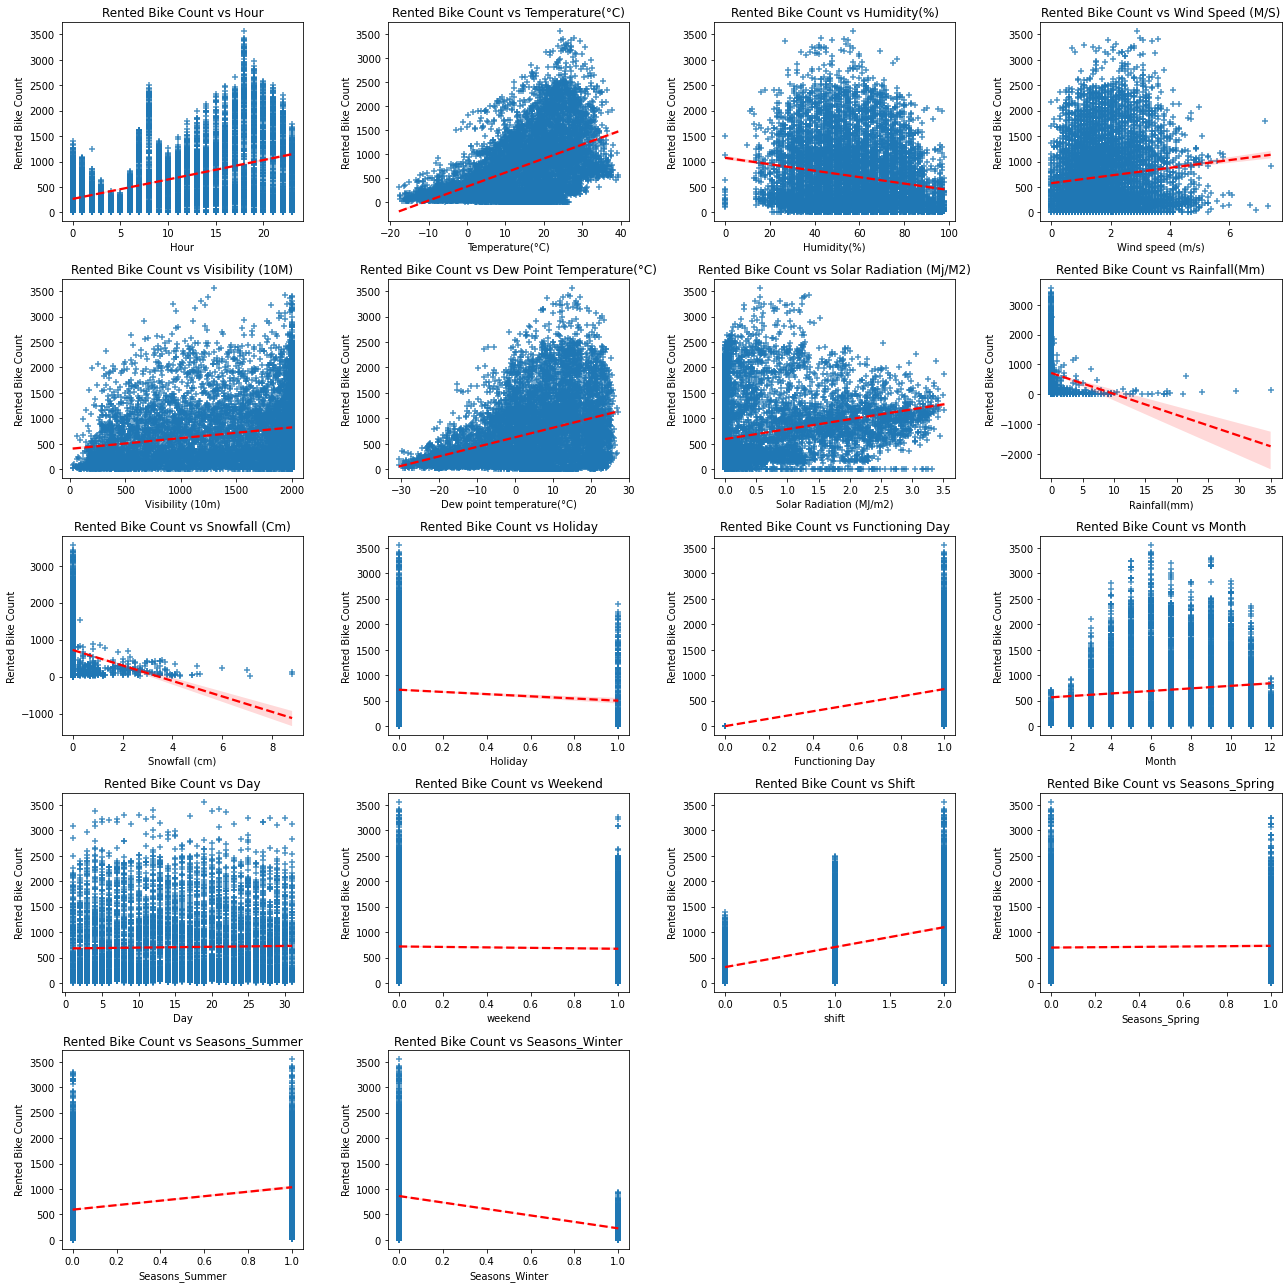

In [183]:
plt.figure(figsize = (18,18))
for index, column in enumerate(independent_variable) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = bike_df_copy, x = column, y = 'Rented Bike Count', marker = '+' , line_kws = {'color' : 'red', 'linestyle':'--'})
  plt.title(f'Rented Bike Count vs {column.title()}')
  plt.tight_layout()

**Observations drawn from the scatter plots are as follows**:

* **Demand for bikes is higher during morning hours and hours between 15 and 20. This maybe due to normal environment conditions when there is less heat and also starting and ending office hours.**

* **Demand is high when temperatures are high , reason may be due to high visibility.**

* **Demand is high during less humidity.**

* **Demand is high when windspeed is less.**

* **Demand is high when solar radiation is less.**

* **Demand is high when there is less rainfall.**

* **Demand is almost the same for each day.**

* **Demand is high during summer time of the year.**

* **Demands are very high on functioning days.**


# **Checking Multicolinearity**

In [184]:
# Let's define function to calculate Variance Inflation Factor

def calculate_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by= 'VIF', ascending = False))

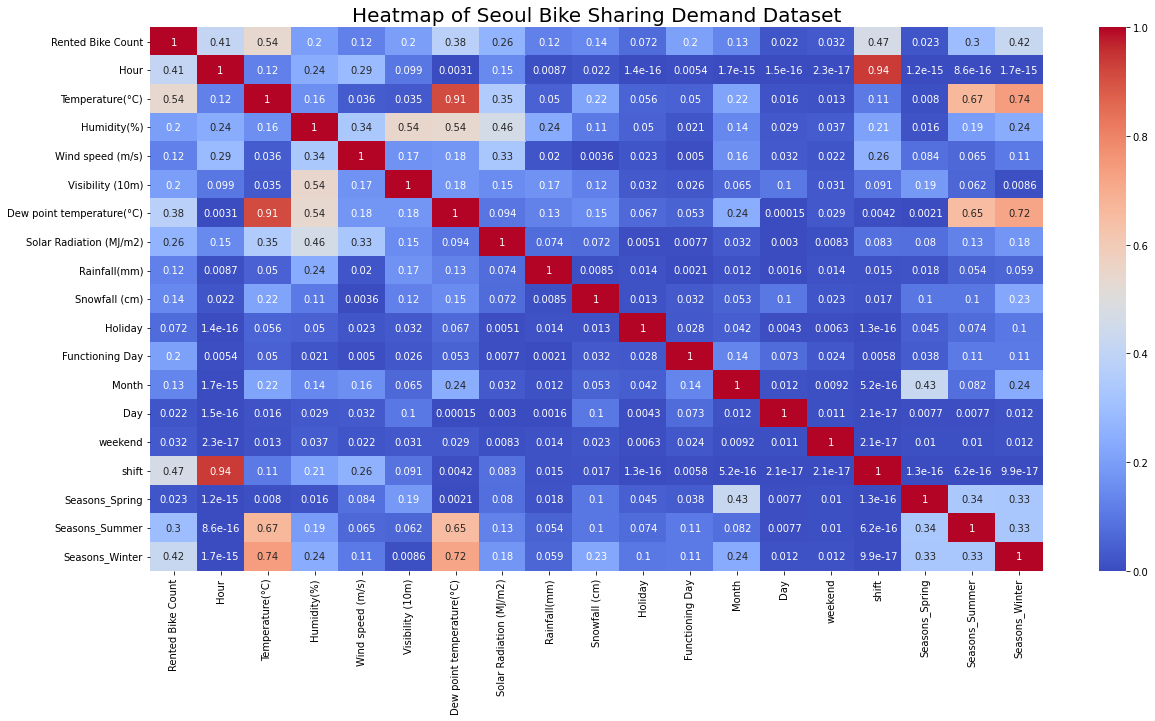

In [185]:
# Let's first check Correlation Heatmap

plt.figure(figsize = (20,10))
sns.heatmap(abs(bike_df_copy.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Seoul Bike Sharing Demand Dataset",  fontsize  = 20)
plt.show();

* **From above we can see that there are highly correlated features present, let's treat them by checking multicolinearity between different independent variables with the help of variance inflation factor.**

In [186]:
# Let's check VIF 

independent_variables = [i for i in bike_df_copy.columns if i not in ['Rented Bike Count']]
calculate_vif(bike_df_copy[independent_variables])

,variables,VIF
1,Temperature(°C),53.971651
5,Dew point temperature(°C),34.081319
0,Hour,33.015333
10,Functioning Day,30.694040
2,Humidity(%),27.529223
14,shift,23.217307
4,Visibility (10m),9.962396
11,Month,8.200745
17,Seasons_Winter,5.020106
3,Wind speed (m/s),4.932561


* **From above it can be seen that , there is high vif for Temperature and Dew Point Temperature (53 and 34 respectively), we have to remove one of them. As we can see that between Temperature and Dew Point Temperature , Dew Point Temperature is less correlated (0.38) with our target variable compare to Temperature (0.54) , so we can remove Dew Point Temperature.**

In [187]:
# Let's check VIF 

calculate_vif(bike_df_copy[[i for i in bike_df_copy.columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,32.531576
9,Functioning Day,24.739918
13,shift,23.131004
2,Humidity(%),13.616064
1,Temperature(°C),10.771604
10,Month,7.586345
4,Visibility (10m),7.319821
3,Wind speed (m/s),4.841443
16,Seasons_Winter,4.390728
11,Day,4.137880


* **We can remove functioning day , as it is having less dependency on dependent variable.**

In [188]:
# Let's check VIF 

calculate_vif(bike_df_copy[[i for i in bike_df_copy.columns if i not in ['Rented Bike Count','Dew point temperature(°C)', 'Functioning Day']]])

,variables,VIF
0,Hour,32.378418
12,shift,23.119992
1,Temperature(°C),10.771162
2,Humidity(%),10.545661
9,Month,7.329220
4,Visibility (10m),6.132625
3,Wind speed (m/s),4.834103
10,Day,3.929656
15,Seasons_Winter,3.830155
14,Seasons_Summer,3.732754


* **We can remove 'shift' column , as it is having less dependency on dependent variable.**
* **Also summer and winter both are highly correleated with temperature column, so we can remove both of them.**

In [189]:
# Let's check VIF 

calculate_vif(bike_df_copy[[i for i in bike_df_copy.columns if i not in ['Rented Bike Count','Dew point temperature(°C)', 'Functioning Day','shift','Seasons_Winter','Seasons_Summer']]])

,variables,VIF
2,Humidity(%),7.833786
9,Month,5.914015
4,Visibility (10m),5.544407
3,Wind speed (m/s),4.707476
0,Hour,4.019816
10,Day,3.812845
1,Temperature(°C),3.309920
5,Solar Radiation (MJ/m2),2.335861
12,Seasons_Spring,1.647504
11,weekend,1.401594


* **Great! Our motive was to get VIF score under 10, as we can see from above that we have achieved it.**

In [190]:
# Let's update the new independent variables 

independent_variables = [i for i in bike_df_copy.columns if i not in ['Rented Bike Count','Dew point temperature(°C)', 'Functioning Day','shift','Seasons_Winter','Seasons_Summer']]

# Updating the dataset

updated_bike_df = bike_df_copy[independent_variables + ['Rented Bike Count']]

In [191]:
# Let's view the columns of the dataset

updated_bike_df.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Month', 'Day', 'weekend', 'Seasons_Spring',
       'Rented Bike Count'],
      dtype='object')

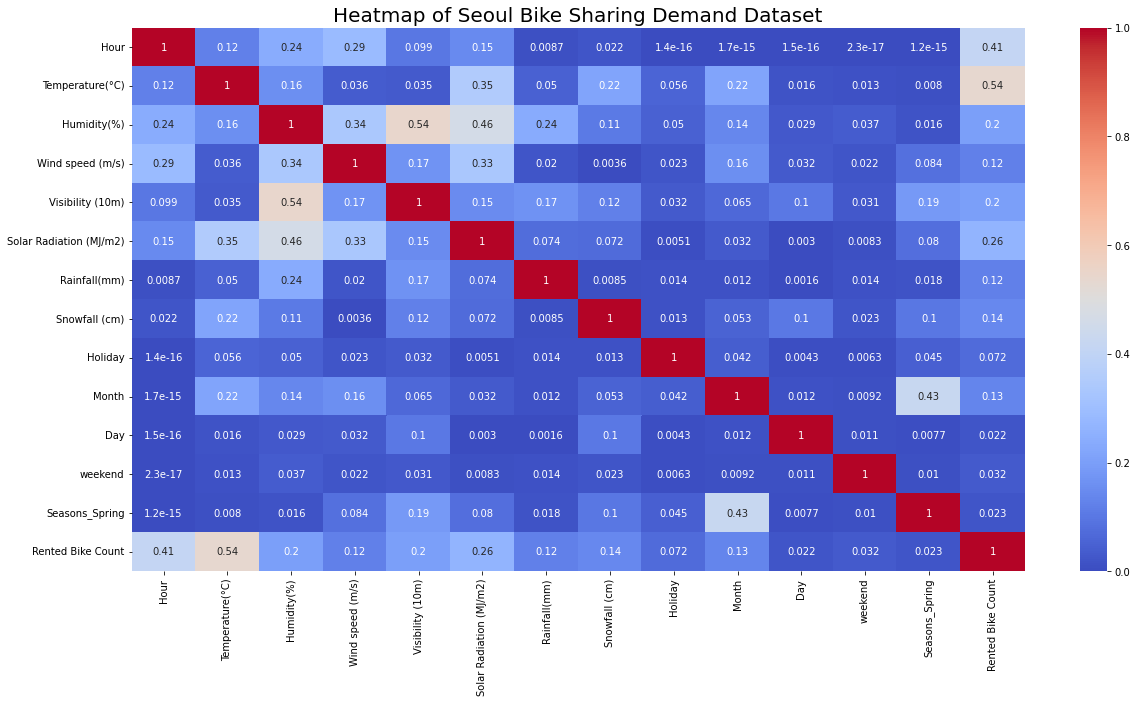

In [192]:
# Let's check Correlation Heatmap with updated dataset

plt.figure(figsize = (20,10))
sns.heatmap(abs(updated_bike_df.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Seoul Bike Sharing Demand Dataset",  fontsize  = 20)
plt.show();

* **From above we can see that, We have removed highly correlated data from our dataset.**

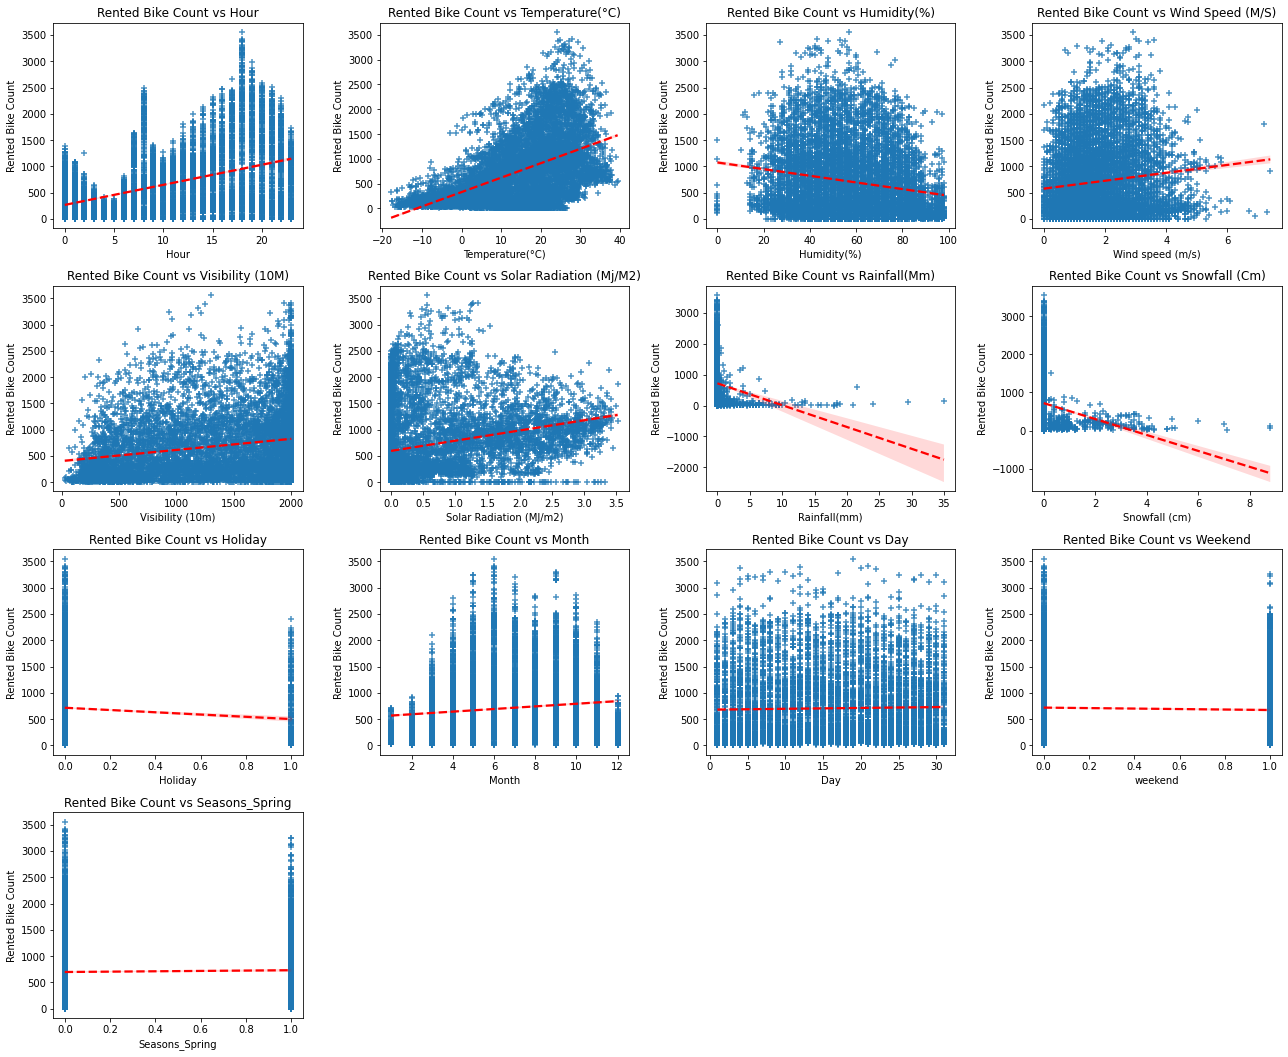

In [193]:
# Checking Linearity of the new dataset

plt.figure(figsize = (18,18))
for index, column in enumerate(independent_variables) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = updated_bike_df , x = column, y = 'Rented Bike Count', marker = '+' , line_kws = {'color' : 'red', 'linestyle':'--'})
  plt.title(f'Rented Bike Count vs {column.title()}')
  plt.tight_layout()

##**Train - Test Split and Standardization**

In [194]:
# Let's create variables to store independent features and dependent features

X = updated_bike_df[independent_variables]
y = np.sqrt(updated_bike_df['Rented Bike Count'])

In [195]:
# Now let's split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [196]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : X_train = {y_train.shape}, X_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (7008, 13), X_test = (1752, 13)
The shape of the train and test set for the dependent variables are : X_train = (7008,), X_test = (1752,)


In [197]:
# Let's do standardizing the independent variables

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
# Let's see values after transformation

print(f"X_train : \n \n {X_train}")
print('\n')
print('--'*40)
print('\n')
print(f"X_test : \n \n {X_test}")
print('\n')
print('--'*40)

X_train : 
 
 [[0.65217391 0.45534151 0.63265306 ... 0.73333333 0.         0.        ]
 [0.7826087  0.80910683 0.58163265 ... 1.         0.         0.        ]
 [0.47826087 0.83537653 0.58163265 ... 0.73333333 0.         0.        ]
 ...
 [0.47826087 0.75831874 0.58163265 ... 0.66666667 0.         0.        ]
 [0.         0.45709282 0.60204082 ... 0.5        0.         1.        ]
 [0.86956522 0.43607706 0.84693878 ... 0.76666667 1.         1.        ]]


--------------------------------------------------------------------------------


X_test : 
 
 [[0.13043478 0.49912434 0.74489796 ... 0.6        1.         1.        ]
 [0.08695652 0.69176883 0.79591837 ... 0.46666667 1.         0.        ]
 [0.73913043 0.37478109 0.66326531 ... 0.3        0.         0.        ]
 ...
 [0.         0.48336252 0.87755102 ... 0.76666667 0.         1.        ]
 [0.95652174 0.52714536 0.66326531 ... 0.6        0.         0.        ]
 [0.         0.49211909 0.68367347 ... 0.6        0.         0.        ]]


##**Now we will be applying different Machine Learning algorithm.**

**1. Linear Regression** 

In [199]:
# Let's make a Lienar Regression model 

lr = LinearRegression()


In [200]:
# Let's fit the data

lr.fit(X_train,y_train)

LinearRegression()

In [201]:
# Let's Predict for both train and test set

y_pred_trainlr = lr.predict(X_train)
y_pred_testlr = lr.predict(X_test)



In [202]:
# Let's check coefficients and intercept

print(f"Intercept value is : {lr.intercept_}")
print('\n')
print('--'*40)
print('\n')
print(f"Coefficient values are : {lr.coef_}")

Intercept value is : 6.81301707201877


--------------------------------------------------------------------------------


Coefficient values are : [ 11.27477423  32.54305967 -14.38456657  -0.28891632   1.16117682
  -2.90990107 -52.52230397  -1.63656166  -4.142431     3.07533797
   1.12952444  -1.07426943   2.14054152]


In [203]:
# Let's find the different evaluation metrics for training and test set

print('Evaluation Metrics Values for Training Set :  Linear Regression')
print("\n")
print('The Mean Absolute Error of Training set : ', mean_absolute_error((y_train)**2,(y_pred_trainlr)**2))
print('The Mean Squared Error of Training set : ', mean_squared_error((y_train)**2,(y_pred_trainlr)**2))
print('The R2 Score of Training set : ', r2_score((y_train)**2,(y_pred_trainlr)**2))
print('The Root Mean Square Error of Training set : ', np.sqrt(mean_squared_error((y_train)**2,(y_pred_trainlr)**2)))
print("\n")
print('=='*35)
print("\n")
print('Evaluation Metrics Values for Test Set :  Linear Regression')
print("\n")
print('The Mean Absolute Error of Test set : ', mean_absolute_error((y_test)**2,(y_pred_testlr)**2))
print('The Mean Squared Error of Test set : ', mean_squared_error((y_test)**2,(y_pred_testlr)**2))
print('The R2 Score of Test set : ', r2_score((y_test)**2,(y_pred_testlr)**2))
print('The Root Mean Square Error of Test set : ', np.sqrt(mean_squared_error((y_test)**2,(y_pred_testlr)**2)))
print("\n")
print('=='*35)

Evaluation Metrics Values for Training Set :  Linear Regression


The Mean Absolute Error of Training set :  316.71835523841605
The Mean Squared Error of Training set :  213511.9547679803
The R2 Score of Training set :  0.48581446489395563
The Root Mean Square Error of Training set :  462.0735382685101




Evaluation Metrics Values for Test Set :  Linear Regression


The Mean Absolute Error of Test set :  319.40839500918486
The Mean Squared Error of Test set :  217765.87830075063
The R2 Score of Test set :  0.4796795099997331
The Root Mean Square Error of Test set :  466.65391705283116




In [204]:
# Let's make a dataframe to store the results from Linear Regression model

dict1 = {'Model' : ' Linear Regression ',
         'MAE' : round( mean_absolute_error((y_train)**2,(y_pred_trainlr)**2),2),
         'MSE' : round( mean_squared_error((y_train)**2,(y_pred_trainlr)**2),2),
         'R2 Score' : round( r2_score((y_train)**2,(y_pred_trainlr)**2),2),
         'RMSE' : round( np.sqrt(mean_squared_error((y_train)**2,(y_pred_trainlr)**2)),2)
       }

Training_dataset = pd.DataFrame(dict1, index = [1])


dict2 = {'Model' : ' Linear Regression ',
         'MAE' : round( mean_absolute_error((y_test)**2,(y_pred_testlr)**2),2),
         'MSE' : round( mean_squared_error((y_test)**2,(y_pred_testlr)**2),2),
         'R2 Score' : round( r2_score((y_test)**2,(y_pred_testlr)**2),2),
         'RMSE' : round( np.sqrt(mean_squared_error((y_test)**2,(y_pred_testlr)**2)),2)
       }

Test_dataset = pd.DataFrame(dict2, index = [1])


In [205]:
# Let's see the Evaluation metrics of Training Dataframe

Training_dataset

,Model,MAE,MSE,R2 Score,RMSE
1,Linear Regression,316.72,213511.95,0.49,462.07


In [206]:
# Let's see the Evaluation metrics of Test Dataframe

Test_dataset

,Model,MAE,MSE,R2 Score,RMSE
1,Linear Regression,319.41,217765.88,0.48,466.65


* **As we can see from above that our R2 score for Training Dataset is 0.49 and Test Dataset is for 0.48,  this means our model is not doing well on the data. Let's see if the Linear Regression assumptions are satisfied or not for the given dataset.**

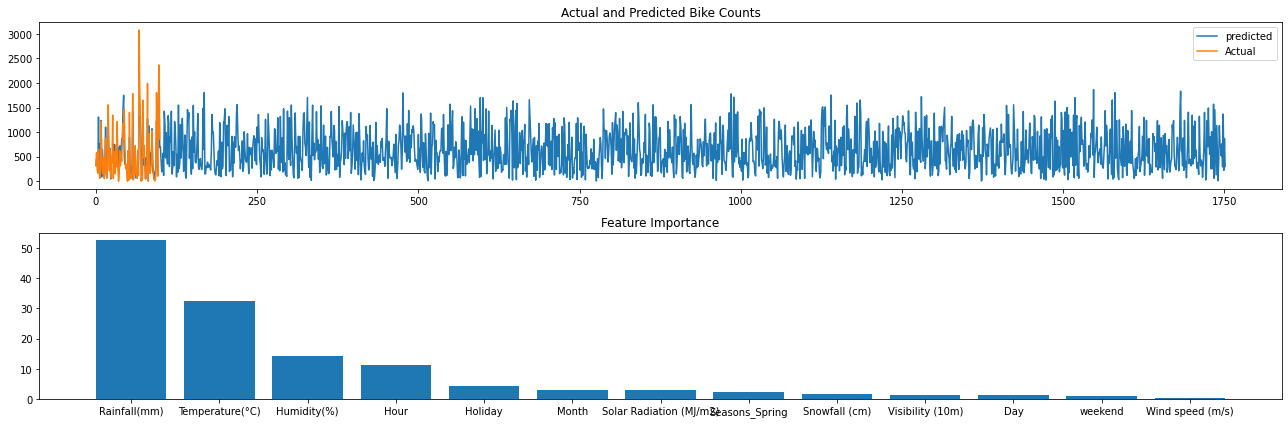

In [218]:
importance = np.abs(lr.coef_)
indices = np.argsort(importance)
indices = indices[::-1]



plt.figure(figsize = (18,6))

plt.subplot(2,1,1)
plt.plot(y_pred_testlr)[:100]
plt.plot((np.array(y_test)[:100]))
plt.legend(["predicted", "Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)), importance[indices])
plt.xticks(range(len(indices)),[independent_variables[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

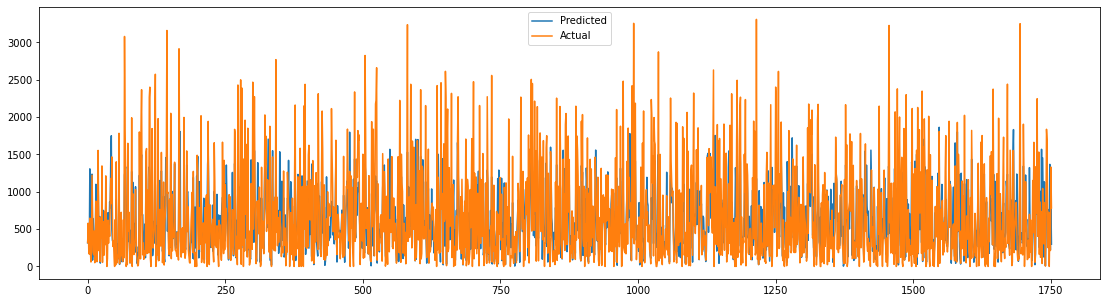

In [228]:
plt.figure(figsize=(19,5))
plt.plot((y_pred_testlr)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()